In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from typing import List
sb.set()

# Exploratory Data Analysis Functions

## get_dataset_raw()
- inputs: None
- returns: Dataframe
- description: 
    - import data from dataset/Course_info.csv and convert to dataframe 
    - change the dataframe features/columns types to the appropiate types
- remarks: if there is a change of dataset, there will be a need to do some modification to the function.

In [53]:
def get_dataset_raw() -> pd.DataFrame:
    dataset_folder_path: str = "dataset"
    dataset_name: str = "Course_info.csv"
    csv_data: pd.DataFrame = pd.read_csv(f"{dataset_folder_path}/{dataset_name}")

    # Assign the features to the correct datatype
    csv_data['id'] = csv_data['id'].astype(int)
    csv_data['num_subscribers'] = csv_data['num_subscribers'].astype(int)
    csv_data['num_reviews'] = csv_data['num_reviews'].astype(int)
    csv_data['num_comments'] = csv_data['num_comments'].astype(int)
    csv_data['num_lectures'] = csv_data['num_lectures'].astype(int)
    csv_data['content_length_min'] = csv_data['content_length_min'].astype(int)
    csv_data['published_time'] = pd.to_datetime(csv_data['published_time'])
    csv_data['last_update_date'] = pd.to_datetime(csv_data['last_update_date'])
    csv_data['category'] = csv_data['category'].astype('category')
    csv_data['subcategory'] = csv_data['subcategory'].astype('category')
    csv_data['language'] = csv_data['language'].astype('category')
    
    return csv_data

## clean_up_dataset()
- input: Dataframe
- returns: clean up Dataframe
- description: Function cleans up the dataset such as
    - set uppercase of the feature (column) labels
    - find NAN, NULL and NAT samples and remove them
    - remove 0 price
- remarks: **INCOMPLETE**

In [54]:
def clean_up_dataset(dataframe: pd.DataFrame) -> pd.DataFrame:
    total_rows = dataframe.shape[0]
    print(f"Total samples: {total_rows}")
    #remove price = 0
    #dataframe=  pd.DataFrame(dataframe[rawcoursedata['price'] != 0])
    dataframe = dataframe[dataframe['price'] != 0]
    

    # total_duplicated_ids = dataframe[dataframe.duplicated('id', keep=False)]
    # print(f"Course with duplicated ids: {len(total_duplicated_ids)}")
    #add condition if there is duplicates

    # display the null values for each column
    print(dataframe.isnull().sum())
    
    # for column in dataframe.columns:
    #     print(f"{column}: {type(column)} -> {dataframe[column].dtype}, {dataframe[column].isnull().sum()}")

    #     if dataframe[column].isnull().sum() == 0:
    #         continue
        
    #     if pd.api.types.is_datetime64_dtype(dataframe[column]):
    #         print(f"is_datetime64")
    #         dataframe[column].fillna(value="NoUpdates")
    
    return dataframe

## generate_numerical_eda_visualization()
- inputs: 
    - dataframe
    - List of catergorical features/columns which are numerical types
    - plot title
- returns: None
- description: generates box, histo and violin plot for every numerical features (column) of the dataset
- remakrs: None

In [55]:
def generate_numerical_eda_visualization(
        dataframe: pd.DataFrame,
        catergorical_column: List[str],
        plot_title: str
    ):
    
    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    total_features = len(numerical_dataframe.columns)
    figure, axes = plt.subplots(
        total_features, 
        3, 
        figsize=(24,4.8*total_features)
    )
    count = 0
    
    # figure.suptitle(plot_title, fontsize=10)
    axes[0, 1].set_title(plot_title)

    for column in numerical_dataframe.columns:
        sb.boxplot(data=numerical_dataframe[column], orient='h', ax=axes[count,0])
        sb.histplot(data=numerical_dataframe[column], ax=axes[count,1])
        sb.violinplot(data=numerical_dataframe[column], orient='h', ax=axes[count,2])
        count = count + 1

## get_outlier_samples()
- inputs: Dataframe
- returns: Series of outliers based on supplied dataframe
- description: identify the outliers based on the supplied dataframe
- remakrs: None

In [56]:
def get_outlier_samples(dataframe: pd.DataFrame) -> pd.core.series.Series:

    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    interquartile_range = q3-q1

    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers: pd.core.series.Series = ((dataframe < lower_whisker) | (dataframe > upper_whisker))

    return outliers

## print_feature_outliers()
- inputs:
    - Dataframe
    - List of catergorical features/columns which are numerical types
- returns: None
- description: prints number of outliers for every numerical features/column
- remarks: None

In [57]:
def print_feature_outliers(
        dataframe: pd.DataFrame, 
        catergorical_column: List[str]
    ):

    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    for column in numerical_dataframe.columns:

        outliers = sum(get_outlier_samples(numerical_dataframe[column]))
        print(f"[{column}] total outliers: {outliers}")

## remove_outliers()
- inputs:
    - Dataframe
    - List of catergorical features/columns which are numerical types
- returns: Dataframe with outliers removed
- description: Function remove **UNION** outlier of the dataset. In other words remove the entire row containing outliers
- remarks: None

In [58]:
def remove_outliers(
        dataframe: pd.DataFrame, 
        catergorical_column: List[str]
    ) -> pd.DataFrame:

    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    union_outliers = (get_outlier_samples(numerical_dataframe)).any(axis=1)
    # print(f"Total 'UNION' outliers: {sum(union_outliers)}")
    dataframe_with_outliers_removed: pd.DataFrame = dataframe[~union_outliers].reset_index(drop=True)
    return dataframe_with_outliers_removed

## generate_categorical_count_visualization()
- inputs: Dataframe
- returns: None
- description: generates categorical plot for every catergorical features (column) of the dataset
- remakrs: None

In [59]:
def generate_categorical_count_visualization(dataframe: pd.DataFrame):
    
    categorical_dataframe = dataframe.select_dtypes(include=['category'])

    for column in categorical_dataframe.columns:
        category_total_types = len(dataframe[column].value_counts())        
        sb.catplot(y=column, data=categorical_dataframe, kind="count", height=category_total_types)

## generate_categorical_eda_visualization()
- inputs: 
    - dataframe
    - y_axis: numerical feature
    - x_axis: catergorical feature
    - plot title
- returns: None
- description: generates categorical plot for every catergorical features (column) of the dataset
- remarks: None

In [60]:
def generate_categorical_eda_visualization(
        dataframe: pd.DataFrame,
        y_axis: str,
        x_axis: str,
        plot_title: str
    ):

    # category_total_types = len(dataframe[x_axis].value_counts()) 
    figure = plt.figure(figsize=(20,8))
    figure.suptitle(plot_title)
    figure.tight_layout()
    sb_plot = sb.boxplot(y=y_axis, x=x_axis, data=dataframe, order=dataframe.groupby(x_axis)[y_axis].median().sort_values().index)
    sb_plot.set_xticklabels(sb_plot.get_xticklabels(), rotation=40, ha='right')

## generate_numerical_heatmap()
- inputs: 
    - dataframe
    - List of catergorical features/columns which are numerical types
    - plot title
- returns: None
- description: generates heatmap for every numerical features (column) of the dataset
- remarks: None

In [61]:
def generate_numerical_heatmap(
        dataframe: pd.DataFrame,
        catergorical_column: List[str],
        plot_title: str
    ):
    
    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    numerical_dataframe = numerical_dataframe.drop(columns=catergorical_column)

    figure = plt.figure(figsize=(13, 13))
    figure.suptitle(plot_title)
    sb.heatmap(numerical_dataframe.corr(), vmin = -1, vmax = 1, linewidths = 1,
            annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## generate_categorical_based_on_numerical_feature_heatmap
- inputs: 
    - dataframe
    - y_axis: numerical feature
    - x_axis: catergorical feature
    - numerical_feature: the numerical feature to associate with different type of x and y axis
    - plot title
- returns: None
- description: generates categorical plot for every catergorical features (column) of the dataset
- remarks: None

In [62]:
def generate_categorical_based_on_numerical_feature_heatmap(
       dataframe: pd.DataFrame,
       y_axis: str,
       x_axis: str,
       numerical_feature: str,
       plot_title: str
    ):

    total_means = dataframe.groupby([y_axis, x_axis]).mean().loc[:, numerical_feature]

    # Display the TOP numerical feature in each pair type -- top 20
    print(total_means.reset_index().sort_values(numerical_feature, ascending=False).head(20).round(2))


    x_axis_total_types = len(dataframe[x_axis].value_counts())
    y_axis_total_types = len(dataframe[y_axis].value_counts()) 
    figure = plt.figure(figsize=(x_axis_total_types, y_axis_total_types))
    figure.suptitle(plot_title)
    figure.tight_layout()
    sb_plot = sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")
    sb_plot.set_xticklabels(sb_plot.get_xticklabels(), rotation=90, ha='right')

# Exploratory Data Analysis
- Objective: Perform EDA on dataset while ensure that all function is working fine
- Motivation of Analysis: The type course catergory will impact the number of subscribers, price and average rating 

In [63]:
DatasetRaw = get_dataset_raw()
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  209734 non-null  int32              
 1   title               209734 non-null  object             
 2   is_paid             209734 non-null  bool               
 3   price               209734 non-null  float64            
 4   headline            209707 non-null  object             
 5   num_subscribers     209734 non-null  int32              
 6   avg_rating          209734 non-null  float64            
 7   num_reviews         209734 non-null  int32              
 8   num_comments        209734 non-null  int32              
 9   num_lectures        209734 non-null  int32              
 10  content_length_min  209734 non-null  int32              
 11  published_time      209734 non-null  datetime64[ns, UTC]
 12  last_update_date

In [64]:
# removing 
# 'id' cause doesn't have any significant importance to EDA
# 'instructor_name' cause there is NULL value
# 'published_time' cause its time series
# 'last_update_date' cause there is null value and not so simeple to do EDA
# 'num_reviews' cause doesnt seem to have any impact given we have average rating
# 'num_comments' cause doesnt seem to have any impact given we have average rating
# 'subcategory' have yet to decide if there is any need due to large number of types 
# 'language' have yet to decide if this matter at the time of doing this EDA 
ExtractedDataset = pd.DataFrame(
    DatasetRaw[[
        'price', 
        'num_subscribers', 
        'avg_rating', 
        'num_lectures',
        'content_length_min', 
        'category',
        'subcategory'
    ]]
)

In [65]:
print("Data type : ", type(ExtractedDataset))
print(ExtractedDataset.dtypes)
print("Data dims : ", ExtractedDataset.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
price                  float64
num_subscribers          int32
avg_rating             float64
num_lectures             int32
content_length_min       int32
category              category
subcategory           category
dtype: object
Data dims :  (209734, 7)


In [66]:
CleanDataset = clean_up_dataset(ExtractedDataset)

Total samples: 209734
price                 0
num_subscribers       0
avg_rating            0
num_lectures          0
content_length_min    0
category              0
subcategory           0
dtype: int64


In [67]:
print("Data type : ", type(CleanDataset))
print(CleanDataset.dtypes)
print("Data dims : ", CleanDataset.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
price                  float64
num_subscribers          int32
avg_rating             float64
num_lectures             int32
content_length_min       int32
category              category
subcategory           category
dtype: object
Data dims :  (187996, 7)


In [68]:
CleanDataset

,price,num_subscribers,avg_rating,num_lectures,content_length_min,category,subcategory
0,24.99,2231,3.75000,37,1268,Lifestyle,Food & Beverage
2,19.99,1713,4.40000,14,82,Lifestyle,Other Lifestyle
3,199.99,4988,4.80000,36,1511,Lifestyle,Pet Care & Training
4,159.99,1266,4.75000,38,569,Design,Web Design
5,29.99,20505,4.53012,31,1163,Health & Fitness,Yoga
...,...,...,...,...,...,...,...
209729,19.99,3,0.00000,5,54,Teaching & Academics,Language Learning
209730,49.99,0,0.00000,0,0,IT & Software,IT Certifications
209731,49.99,0,0.00000,0,0,IT & Software,IT Certifications
209732,119.99,0,0.00000,9,82,Finance & Accounting,Other Finance & Accounting


IndexError: too many indices for array

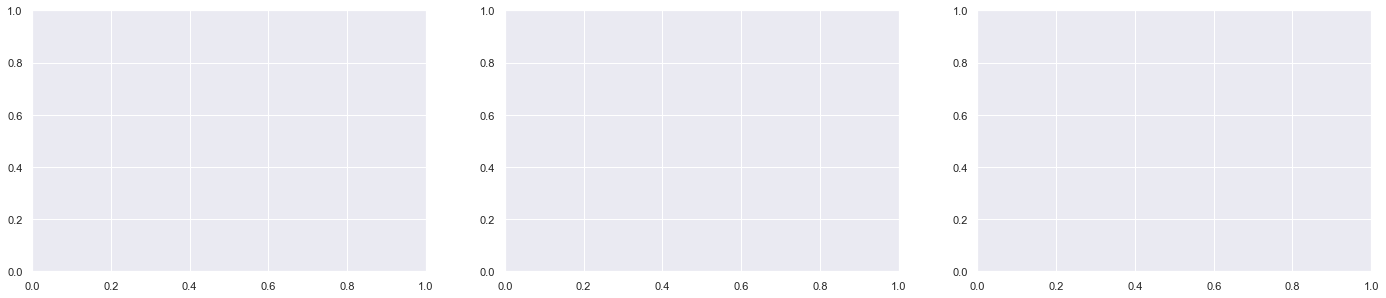

In [69]:
categorical_data_in_numeric = ['avg_rating']
generate_numerical_eda_visualization(CleanDataset, categorical_data_in_numeric, "[RAW] Numerical EDA")

In [ ]:
print_feature_outliers(CleanDataset, categorical_data_in_numeric)

In [ ]:
RemovedOutlierDataset = remove_outliers(CleanDataset, categorical_data_in_numeric)

In [ ]:
generate_numerical_eda_visualization(RemovedOutlierDataset, categorical_data_in_numeric, "[UNION outliers removed] Numerical EDA")

In [ ]:
generate_categorical_count_visualization(RemovedOutlierDataset)

In [ ]:
generate_categorical_eda_visualization(RemovedOutlierDataset, 'num_subscribers', 'category', '[UNION outliers removed] num_subscriber VS category')

In [ ]:
generate_categorical_eda_visualization(RemovedOutlierDataset, 'avg_rating', 'category', '[UNION outliers removed] avg_rating VS category')

In [ ]:
generate_categorical_eda_visualization(RemovedOutlierDataset, 'price', 'category', '[UNION outliers removed] price VS category')

In [ ]:
generate_numerical_heatmap(RemovedOutlierDataset, categorical_data_in_numeric, "[UNION outliers removed] Numerical heatmap")

In [ ]:
generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'avg_rating', 'average rating of course catergory')

In [ ]:
generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'num_subscribers', 'number of subscribers of course catergory')

In [ ]:
generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'price', 'price of course catergory')